In [1]:
import tensorflow as tf

In [2]:
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [8]:
# 손실곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
(x_train,y_train),(x_test,y_test) =  keras.datasets.fashion_mnist.load_data()
ss = StandardScaler()

x_train_scaled =  ss.fit_transform(x_train.reshape( x_train.shape[0],-1 ))

In [55]:
x_train.shape, x_train_scaled.shape, y_train.shape
x_train,x_test,y_train,y_test =  train_test_split(x_train_scaled,y_train,random_state=32)

In [56]:
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
          

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4828 - accuracy: 0.8304
Epoch 2/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3723 - accuracy: 0.8727
Epoch 3/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3382 - accuracy: 0.8840
Epoch 4/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3125 - accuracy: 0.8949
Epoch 5/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2943 - accuracy: 0.9009
Epoch 6/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2779 - accuracy: 0.9066
Epoch 7/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2705 - accuracy: 0.9121
Epoch 8/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2570 - accuracy: 0.9175
Epoch 9/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2469 - accuracy: 0.9205
Epoch 10/10
1407/1407 [==============================] - 2s 2ms/step - loss: 0.244

In [58]:
history.history

{'loss': [0.482814759016037,
  0.3722544312477112,
  0.3382323682308197,
  0.3124649226665497,
  0.29433324933052063,
  0.27792420983314514,
  0.2704891562461853,
  0.25695517659187317,
  0.24689574539661407,
  0.2445141226053238],
 'accuracy': [0.8303999900817871,
  0.8727333545684814,
  0.8839777708053589,
  0.8949333429336548,
  0.9008888602256775,
  0.9066444635391235,
  0.9121111035346985,
  0.9175111055374146,
  0.9205111265182495,
  0.9236666560173035]}

In [59]:
import numpy as np

In [60]:
ss = StandardScaler()
hist_loss2d =  ss.fit_transform(np.array(history.history['loss']).reshape(-1,1))
hist_accuracy2d =  ss.fit_transform(np.array(history.history['accuracy']).reshape(-1,1))

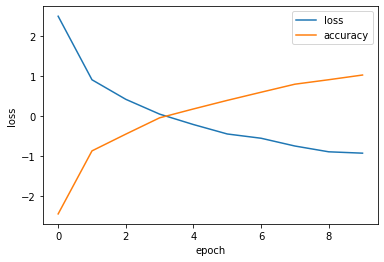

In [61]:
import matplotlib.pyplot as plt
plt.plot(hist_loss2d)
plt.plot(hist_accuracy2d)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','accuracy'])
plt.show()

In [62]:
x_test.shape

(15000, 784)

In [69]:
# epoch = 3
# 검증
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test) )


Epoch 1/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4821 - accuracy: 0.8322 - val_loss: 0.4174 - val_accuracy: 0.8569
Epoch 2/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3692 - accuracy: 0.8737 - val_loss: 0.4172 - val_accuracy: 0.8555
Epoch 3/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3336 - accuracy: 0.8864 - val_loss: 0.3840 - val_accuracy: 0.8756
Epoch 4/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8958 - val_loss: 0.3843 - val_accuracy: 0.8805
Epoch 5/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.9022 - val_loss: 0.3861 - val_accuracy: 0.8843


In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [71]:
history.history

{'loss': [0.4821234345436096,
  0.36918067932128906,
  0.333599716424942,
  0.3084612786769867,
  0.29090821743011475],
 'accuracy': [0.8322222232818604,
  0.873711109161377,
  0.88637775182724,
  0.8958444595336914,
  0.9022444486618042],
 'val_loss': [0.4174441993236542,
  0.4172493517398834,
  0.38397282361984253,
  0.38429000973701477,
  0.3860553205013275],
 'val_accuracy': [0.8568666577339172,
  0.8554666638374329,
  0.8755999803543091,
  0.8805333375930786,
  0.8842666745185852]}

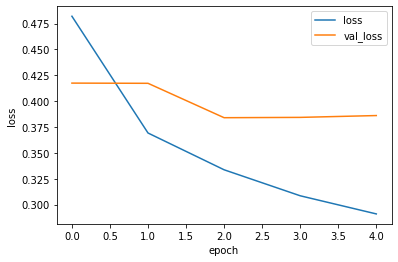

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['loss','val_loss'])
plt.show()

In [79]:
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# history =  model.fit(x_train,y_train,epochs=5, validation_data=(x_test,y_test) )

In [80]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history =  model.fit(x_train,y_train,epochs=20, validation_data=(x_test,y_test) )

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5862 - accuracy: 0.8004 - val_loss: 0.3912 - val_accuracy: 0.8573
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4410 - accuracy: 0.8419 - val_loss: 0.3664 - val_accuracy: 0.8664
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4047 - accuracy: 0.8534 - val_loss: 0.3616 - val_accuracy: 0.8697
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3842 - accuracy: 0.8615 - val_loss: 0.3578 - val_accuracy: 0.8683
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.8678 - val_loss: 0.3456 - val_accuracy: 0.8763
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8683 - val_loss: 0.3412 - val_accuracy: 0.8778
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3462 - accuracy: 0.8739 - val_loss: 0.3362 - val_accuracy:

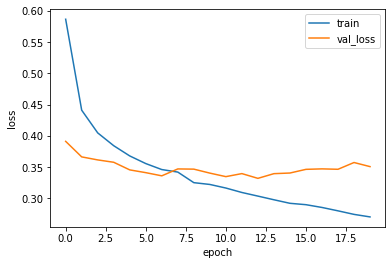

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val_loss'])
plt.show()

In [83]:
# 모델 저장 복원
model.save_weights('model-weights.h5')

In [84]:
model.save('model-whole.h5')

In [87]:
!dir/w

 E 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 6045-BA7D

 E:\4.numpy_workspace 디렉터리

[.]                          [..]
[.ipynb_checkpoints]         2022-08-09_넘파이.ipynb
chromedriver.exe             CoffeBean.csv
[datas]                      excel-comp-data.xlsx
fruits_300.npy               hollys_store.csv
model-weights.h5             model-whole.h5
[source (1)]                 Untitled.ipynb
Untitled1.ipynb              wine.csv
[wins]                       데이터 시각화.ipynb
동적 웹페이지 크롤링.ipynb   동적크롤링_완성.ipynb
머신러닝I.ipynb              머신러닝II.ipynb
머신러닝III.ipynb            머신러닝IV.ipynb
머신러닝V.ipynb              머신러닝VI.ipynb
머신러닝VII.ipynb            머신러닝VIII.ipynb
선형회귀 기초.ipynb          인공지능VIIII.ipynb
전처리.ipynb                 정적웹페이지 크롤링.ipynb
정적크롤링-실습.ipynb        타이타닉 데이터 노트.xlsx
통계분석.ipynb               판다스.ipynb
판다스_20220810.ipynb        
              31개 파일          22,756,094 바이트
               6개 디렉터리  146,635,358,208 바이트 남음


In [99]:
result =  model.predict(x_test)
result

469/469 [==============================] - 1s 1ms/step


array([[3.8532686e-08, 2.8850639e-07, 1.3820532e-10, ..., 2.5677866e-18,
        2.0536027e-12, 8.4846824e-16],
       [2.7218320e-14, 1.0000000e+00, 6.9225479e-15, ..., 1.2849551e-32,
        4.5252244e-21, 2.9898583e-38],
       [4.5379647e-34, 3.8540810e-28, 0.0000000e+00, ..., 1.1324491e-12,
        2.7315782e-27, 9.9997616e-01],
       ...,
       [1.4606617e-06, 1.9946727e-13, 4.5797643e-01, ..., 1.5017790e-22,
        7.0901346e-10, 1.6705963e-20],
       [3.0043055e-03, 1.5257663e-11, 9.7451800e-01, ..., 2.4914706e-13,
        3.3749088e-06, 2.4131977e-15],
       [4.1682949e-08, 4.1028189e-19, 4.9563212e-08, ..., 1.7691537e-11,
        9.9998271e-01, 6.2533045e-20]], dtype=float32)

In [106]:
np.argmax(result[0]), y_test[0]

(3, 3)

In [109]:
result.shape

(15000, 10)

In [113]:
predict_result = np.argmax(result, axis=1)
predict_result.shape, y_test.shape

((15000,), (15000,))

In [115]:
np.mean(predict_result == y_test)

0.8830666666666667

In [117]:
(_,_),(valx_test,valy_test ) =  keras.datasets.fashion_mnist.load_data()

In [123]:
predic_val = model.predict( valx_test.reshape(valx_test.shape[0],-1))

313/313 [==============================] - 0s 1ms/step


In [133]:
np.mean( np.argmax(predic_val,axis=1) == valy_test)

0.7899

In [136]:
ss =StandardScaler()
valx_test_scaled = ss.fit_transform(valx_test.reshape(valx_test.shape[0],-1))
predic_val_scaled = model.predict( valx_test_scaled)
np.mean( np.argmax(predic_val_scaled,axis=1) == valy_test)

313/313 [==============================] - 0s 1ms/step


0.8776

In [163]:
# 데이터 다시 생성
from sklearn.model_selection import train_test_split
(x_train,y_train),(x_test,y_test) =  keras.datasets.fashion_mnist.load_data()
print(x_train.shape ,y_train.shape, x_test.shape,y_test.shape)
x_train_s,x_test_s,y_train_s,y_test_s =  train_test_split(x_train,y_train,random_state=42)
x_train_s.shape, y_train_s.shape, x_test_s.shape, y_test_s.shape
# ss=StandardScaler()
# x_train_scaled = ss.fit_transform(x_train_s)
# x_text_scaled = ss.fit_transform(x_test_s)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


((45000, 28, 28), (45000,), (15000, 28, 28), (15000,))

In [161]:
a = np.array(range(100)).reshape(10,-1)
b = np.array(range(10)).reshape(-1,)
a.shape, b.shape
xtr,xte,ytr,yte =  train_test_split(a,b)
xtr.shape,xte.shape,ytr.shape,yte.shape

((7, 10), (3, 10), (7,), (3,))

In [164]:
x_train_scaled.shape, y_train_s.shape

((45000, 784), (45000,))

In [166]:
# callback
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint =  keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(x_train_scaled,y_train_s,epochs=30,validation_data=(x_text_scaled,y_test_s), callbacks=checkpoint)


Epoch 1/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5933 - accuracy: 0.7957 - val_loss: 0.4015 - val_accuracy: 0.8576
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4387 - accuracy: 0.8420 - val_loss: 0.3759 - val_accuracy: 0.8654
Epoch 3/30
1407/1407 [==============================] - 4s 2ms/step - loss: 0.4020 - accuracy: 0.8552 - val_loss: 0.3699 - val_accuracy: 0.8685
Epoch 4/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8609 - val_loss: 0.3713 - val_accuracy: 0.8674
Epoch 5/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8668 - val_loss: 0.3438 - val_accuracy: 0.8789
Epoch 6/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8704 - val_loss: 0.3570 - val_accuracy: 0.8738
Epoch 7/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3469 - accuracy: 0.8720 - val_loss: 0.3335 - val_accuracy:

In [168]:
tempx =  ss.fit_transform(x_test.reshape(x_test.shape[0],-1))
model.evaluate(tempx,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8754


[0.42731621861457825, 0.8754000067710876]

In [173]:
tempx.shape, y_test.shape

((10000, 784), (10000,))

In [172]:
best_model =  keras.models.load_model('best-model.h5')
best_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [174]:
best_model.evaluate(tempx,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3683 - accuracy: 0.8725


[0.368317574262619, 0.8725000023841858]

In [178]:
# 조기종료...
model = keras.Sequential()
model.add(keras.layers.Dense(100,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint =  keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
earlyStopping = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history =  model.fit(x_train_scaled,y_train_s,epochs=100,validation_data=(x_text_scaled,y_test_s)
          , callbacks=[checkpoint,earlyStopping])

Epoch 1/100
1407/1407 [==============================] - 4s 2ms/step - loss: 0.5905 - accuracy: 0.7993 - val_loss: 0.4048 - val_accuracy: 0.8591
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8419 - val_loss: 0.3832 - val_accuracy: 0.8633
Epoch 3/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4044 - accuracy: 0.8534 - val_loss: 0.3752 - val_accuracy: 0.8648
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3843 - accuracy: 0.8600 - val_loss: 0.3645 - val_accuracy: 0.8678
Epoch 5/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3662 - accuracy: 0.8661 - val_loss: 0.3480 - val_accuracy: 0.8793
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3576 - accuracy: 0.8685 - val_loss: 0.3549 - val_accuracy: 0.8743
Epoch 7/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3460 - accuracy: 0.8736 - val_loss: 0.3417 - val_ac

In [177]:
earlyStopping.stopped_epoch

8

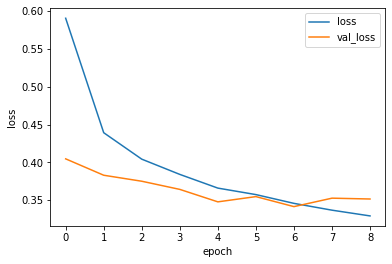

In [179]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [180]:
model.evaluate(tempx,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8710


[0.3826054632663727, 0.8709999918937683]